## Homework 2: MNIST 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to add the channel dimension (28x28 images, 1 channel for grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize the images (values from 0 to 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encoding for the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Create a validation set from the training data
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Kernel design

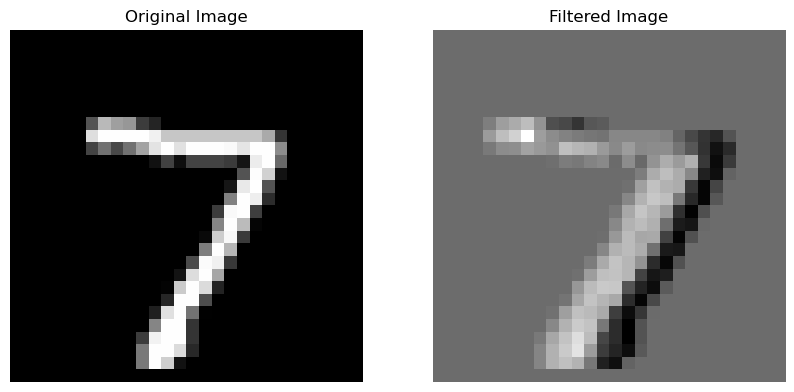

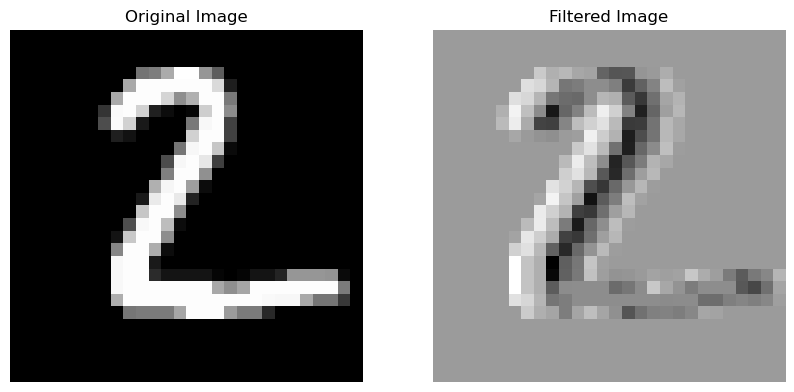

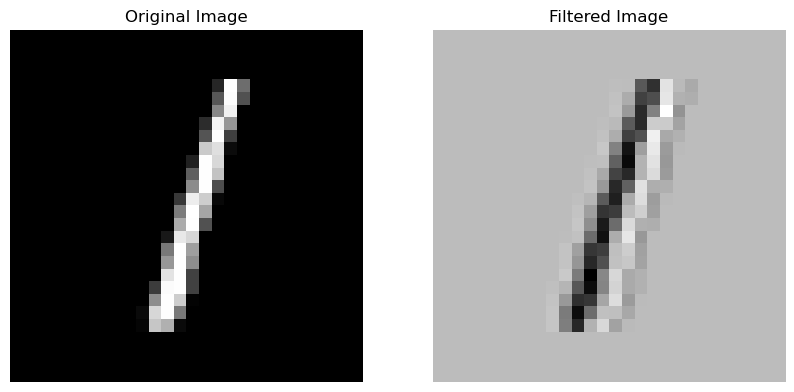

In [3]:
samples = 3
filter_size = 5
for i in range(samples):
  image = x_test[i]
  image_tensor = tf.expand_dims(image, axis=0)
  image_tensor = tf.expand_dims(image_tensor, axis=-1)
  image_tensor = tf.cast(image_tensor, tf.float32)

  filter_weights = np.random.randn(filter_size, filter_size, 1, 1).astype(np.float32)
  filter_tensor = tf.constant(filter_weights)

  # Apply convolution using the filter
  output_tensor = tf.nn.conv2d(image_tensor, filter_tensor, strides=[1, 1, 1, 1], padding='SAME')
  output_image = output_tensor.numpy()[0, :, :, 0]

  # Plot
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title('Original Image')
  axes[0].axis('off')

  axes[1].imshow(output_image, cmap='gray')
  axes[1].set_title('Filtered Image')
  axes[1].axis('off')

  plt.show()

In [4]:
# CNN model
model = Sequential(
    [
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax'),
    ]
)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10


375/375 [==============================] - 6s 13ms/step - loss: 0.2320 - accuracy: 0.9323 - val_loss: 0.0679 - val_accuracy: 0.9776
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0651 - accuracy: 0.9804 - val_loss: 0.0482 - val_accuracy: 0.9839
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.0400 - val_accuracy: 0.9866
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0345 - val_accuracy: 0.9889
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0362 - val_accuracy: 0.9883
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0205 - accuracy: 0.9938 - val_loss: 0.0425 - val_accuracy: 0.9871
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0320 - val_accuracy: 0.98

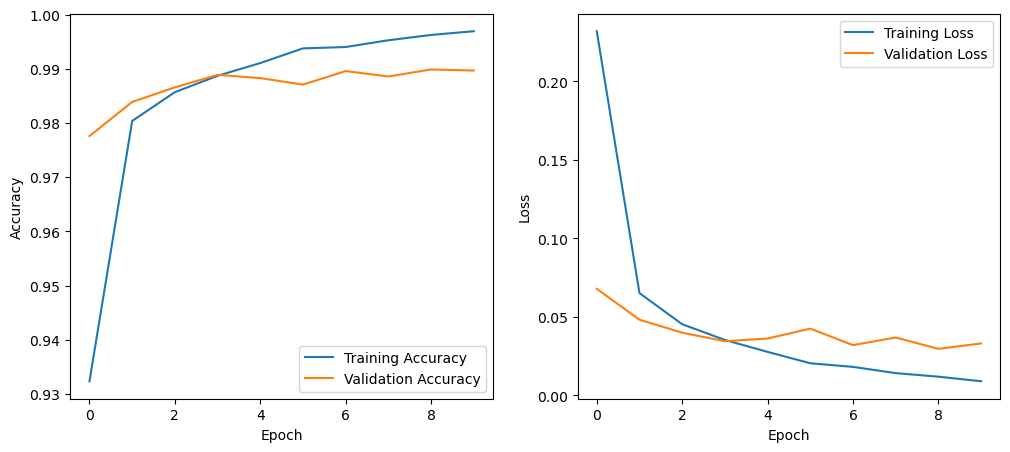

In [6]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()  

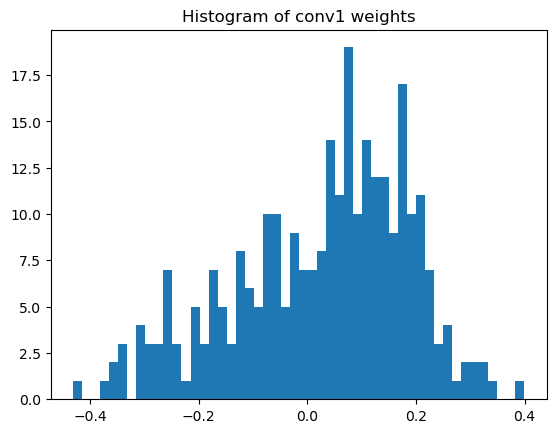

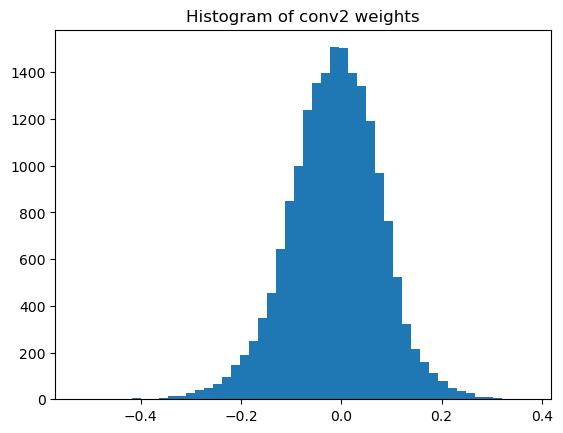

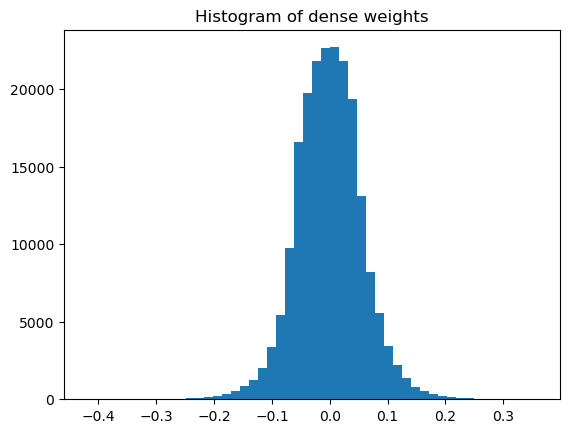

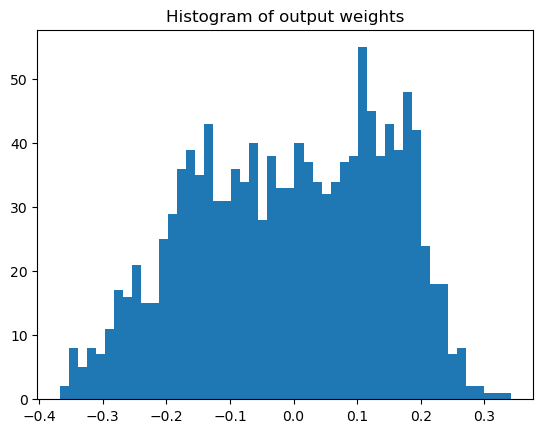

In [7]:
# Get weights from the first convolutional layer
conv1_weights = model.layers[0].get_weights()[0]

# Plot histogram of conv1 weights
plt.hist(conv1_weights.flatten(), bins=50)
plt.title('Histogram of conv1 weights')
plt.show()

# Similarly, you can plot for other layers
conv2_weights = model.layers[2].get_weights()[0]
plt.hist(conv2_weights.flatten(), bins=50)
plt.title('Histogram of conv2 weights')
plt.show()

dense_weights = model.layers[5].get_weights()[0]
plt.hist(dense_weights.flatten(), bins=50)
plt.title('Histogram of dense weights')
plt.show()

output_weights = model.layers[6].get_weights()[0]
plt.hist(output_weights.flatten(), bins=50)
plt.title('Histogram of output weights')
plt.show()



In [8]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

313/313 [==============================] - 1s 1ms/step
[[ 977    1    0    0    0    0    0    1    1    0]
 [   0 1127    2    1    3    0    1    0    1    0]
 [   1    1 1020    0    4    0    0    5    1    0]
 [   0    0    0 1004    0    3    0    0    3    0]
 [   0    0    0    0  977    0    0    0    0    5]
 [   2    0    0    6    0  879    1    0    3    1]
 [   5    2    0    0    9    1  938    0    3    0]
 [   1    1    5    1    1    0    0 1014    1    4]
 [   2    0    2    1    0    1    0    0  967    1]
 [   1    1    1    1    5    4    0    2    0  994]]


## 1.2

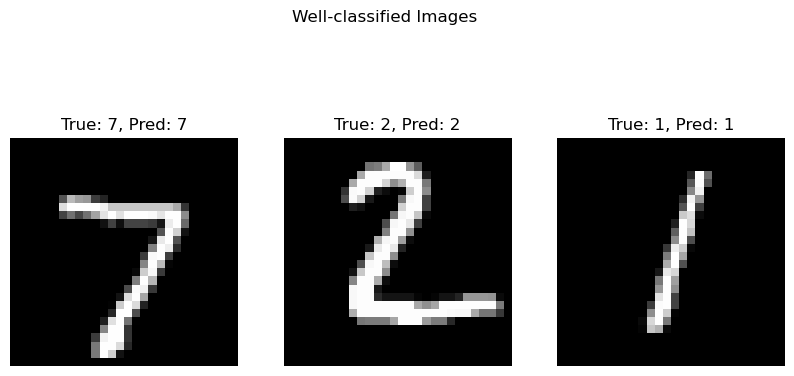

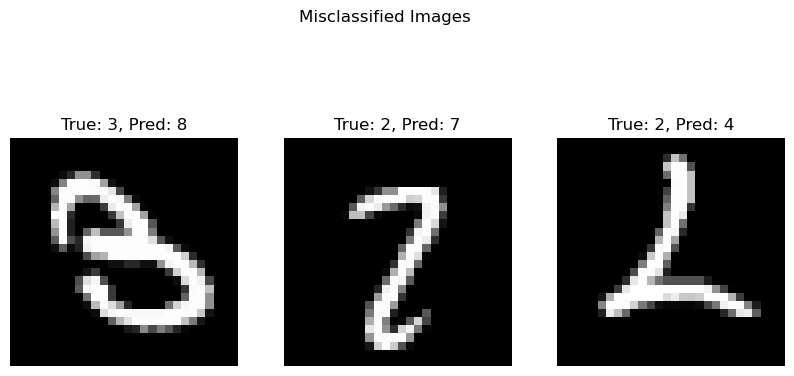

In [9]:
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_indices[:3]):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle('Well-classified Images')
plt.show()

plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:3]):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.suptitle('Misclassified Images')
plt.show()

## 1.3

1/1 [==============================] - 0s 56ms/step


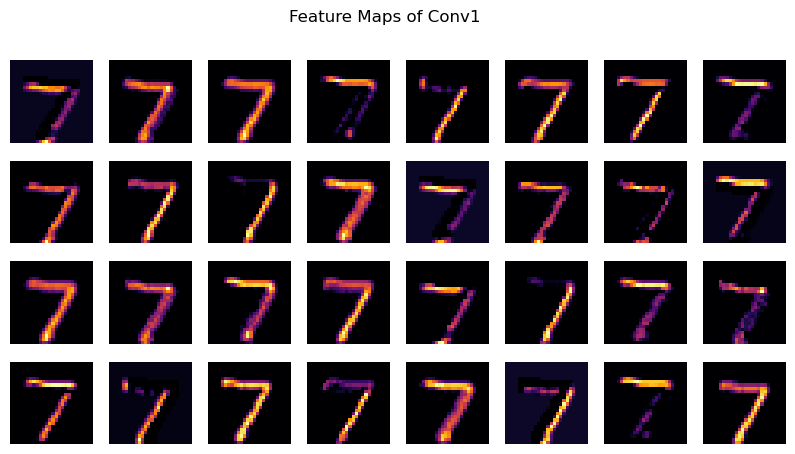

1/1 [==============================] - 0s 17ms/step


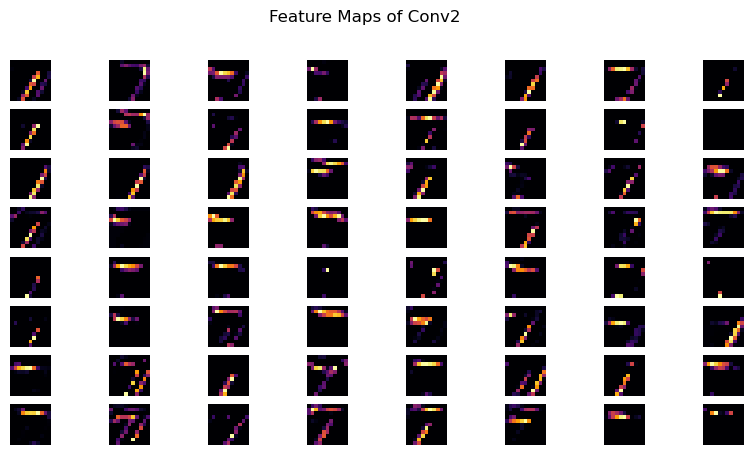

In [10]:
# Visualize the feature maps

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[0].reshape(1, 28, 28, 1))

# 1st convolutional layer
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(activations[0][0, :, :, i], cmap='inferno')
    plt.axis('off')
plt.suptitle('Feature Maps of Conv1')
plt.show()

# 2nd convolutional layer
activations = activation_model.predict(x_test[0].reshape(1, 28, 28, 1))
plt.figure(figsize=(10, 5))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations[2][0, :, :, i], cmap='inferno')
    plt.axis('off')
plt.suptitle('Feature Maps of Conv2')
plt.show()



## 1.4 Let's add regulariztion

In [11]:
# Load the data again
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

lmbda = 0.01

# loss function with L2 regularization
def custom_loss_with_l2(y_true, y_pred):
    cross_entropy_loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true, y_pred))
    
    l2_loss = tf.add_n([tf.nn.l2_loss(weight) for weight in model_reg.trainable_weights])
    
    total_loss = cross_entropy_loss + lmbda * l2_loss
    return total_loss

# our model agn

model_reg = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model_reg
model_reg.compile(optimizer=Adam(), loss=custom_loss_with_l2, metrics=['accuracy'])

# Train the model_reg
history = model_reg.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model_reg on the test set
test_loss, test_acc = model_reg.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.6916 - accuracy: 0.9283 - val_loss: 0.3479 - val_accuracy: 0.9678
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3347 - accuracy: 0.9635 - val_loss: 0.2935 - val_accuracy: 0.9689
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.3055 - accuracy: 0.9667 - val_loss: 0.2795 - val_accuracy: 0.9744
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2974 - accuracy: 0.9682 - val_loss: 0.2701 - val_accuracy: 0.9758
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2897 - accuracy: 0.9696 - val_loss: 0.2736 - val_accuracy: 0.9737
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2853 - accuracy: 0.9691 - val_loss: 0.2711 - val_accuracy: 0.9721
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2848 - accuracy: 0.9692 - val_loss: 0.2730 - val_accuracy: 0.9726

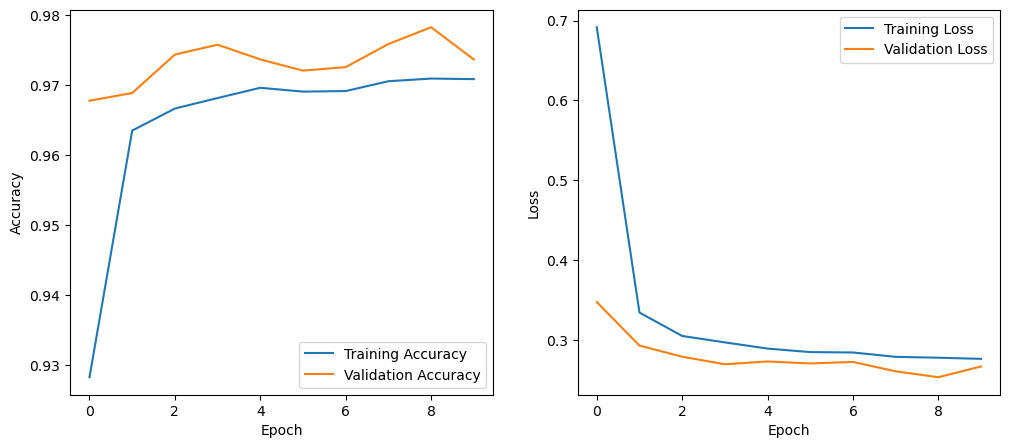

In [12]:
# plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

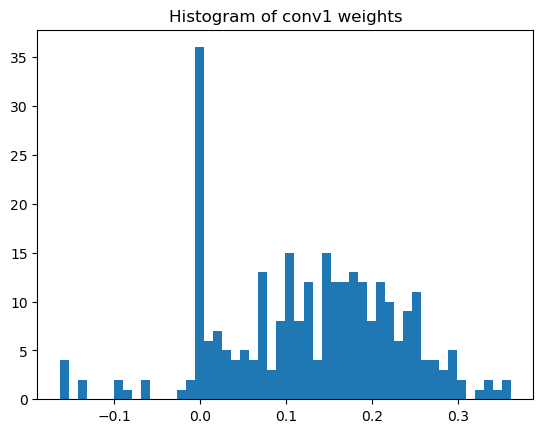

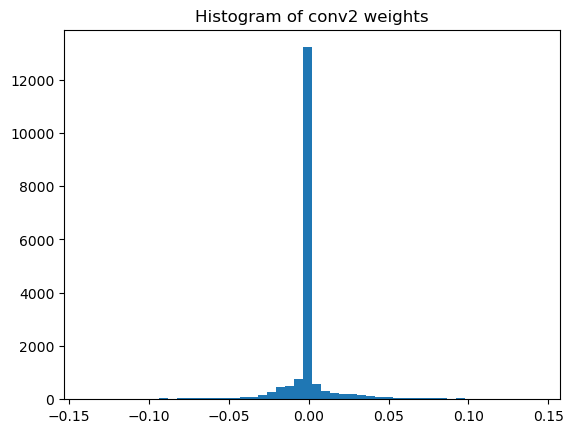

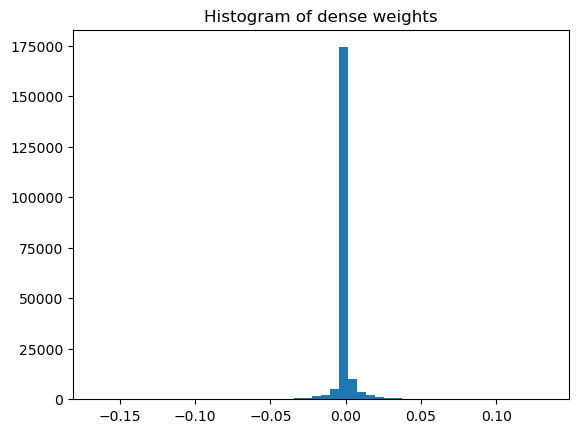

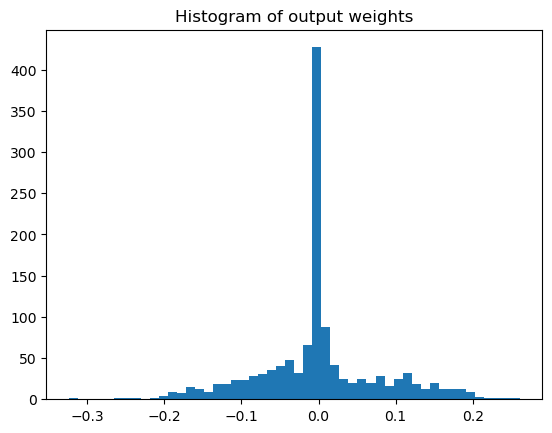

In [13]:
# Get weights from the first convolutional layer
conv1_weights = model_reg.layers[0].get_weights()[0]

# Plot histogram of conv1 weights
plt.hist(conv1_weights.flatten(), bins=50)
plt.title('Histogram of conv1 weights')
plt.show()

# Similarly, you can plot for other layers
conv2_weights = model_reg.layers[2].get_weights()[0]
plt.hist(conv2_weights.flatten(), bins=50)
plt.title('Histogram of conv2 weights')
plt.show()

dense_weights = model_reg.layers[5].get_weights()[0]
plt.hist(dense_weights.flatten(), bins=50)
plt.title('Histogram of dense weights')
plt.show()

output_weights = model_reg.layers[6].get_weights()[0]
plt.hist(output_weights.flatten(), bins=50)
plt.title('Histogram of output weights')
plt.show()

